<a href="https://colab.research.google.com/github/uday96/EVA4-TSAI/blob/master/S7/EVA4_S7_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Initialization

Import required modules

In [0]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim

from config import ModelConfig
from data_engine import DataEngine
from model import Net
from train import train
from test import test
from results import plot_misclassified_images, plot_graph
from utils import *

## Model Configuration and Set Seed

View model configuration and set the seed

In [2]:
# View model config
args = ModelConfig()
args.print_config()

print()
# Set seed
init_seed(args)

Model Parameters:
{  'batch_size_cpu': 64,
   'batch_size_cuda': 64,
   'dropout_value': 0.15,
   'epochs': 50,
   'num_workers': 4,
   'seed': 1}

CUDA Available


## Data Loading and Visualization

Preprocess and load the cifar10 dataset. Visualise the dataset.

Files already downloaded and verified
Files already downloaded and verified
plane   dog  deer  deer


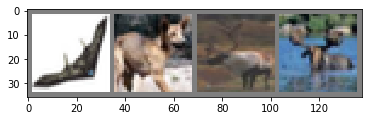

In [3]:
data = DataEngine(args)

# get some random training images
dataiter = iter(data.train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % data.classes[labels[j]] for j in range(4)))

## Model

Create model and display model summary

In [4]:
device = which_device()
model = Net(args).to(device)
show_model_summary(model, device, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
         MaxPool2d-8           [-1, 32, 16, 16]               0
            Conv2d-9           [-1, 64, 16, 16]          18,432
             ReLU-10           [-1, 64, 16, 16]               0
      BatchNorm2d-11           [-1, 64, 16, 16]             128
          Dropout-12           [-1, 64, 16, 16]               0
           Conv2d-13           [-1, 64, 16, 16]          36,864
             ReLU-14           [-1, 64,

## Training and Testing

Train the model and evaluate it

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)

def run():
  test_losses = []
  test_accs = []
  misclassified_imgs = []
  for epoch in range(args.epochs):
      print("EPOCH:", epoch+1)
      train(model, device, data.train_loader, criterion, optimizer, epoch)
      test(model, device, data.test_loader, criterion, data.classes, test_losses, test_accs, misclassified_imgs, epoch==args.epochs-1)
  return test_losses, test_accs, misclassified_imgs

# train and test the model
test_losses, test_accs, misclassified_imgs = run()

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.0311360359191895 Batch_id=781 Accuracy=46.40: 100%|██████████| 782/782 [00:13<00:00, 59.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0193, Accuracy: 5578/10000 (55.78%)

EPOCH: 2


Loss=0.48380959033966064 Batch_id=781 Accuracy=61.45: 100%|██████████| 782/782 [00:13<00:00, 66.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0156, Accuracy: 6492/10000 (64.92%)

EPOCH: 3


Loss=1.4071924686431885 Batch_id=781 Accuracy=67.33: 100%|██████████| 782/782 [00:13<00:00, 59.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0129, Accuracy: 7077/10000 (70.77%)

EPOCH: 4


Loss=0.7516796588897705 Batch_id=781 Accuracy=70.99: 100%|██████████| 782/782 [00:13<00:00, 59.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0121, Accuracy: 7259/10000 (72.59%)

EPOCH: 5


Loss=0.7097634673118591 Batch_id=781 Accuracy=73.83: 100%|██████████| 782/782 [00:13<00:00, 59.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0107, Accuracy: 7631/10000 (76.31%)

EPOCH: 6


Loss=1.2664847373962402 Batch_id=781 Accuracy=75.50: 100%|██████████| 782/782 [00:13<00:00, 59.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0106, Accuracy: 7648/10000 (76.48%)

EPOCH: 7


Loss=1.4216022491455078 Batch_id=781 Accuracy=77.08: 100%|██████████| 782/782 [00:13<00:00, 59.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0099, Accuracy: 7799/10000 (77.99%)

EPOCH: 8


Loss=0.7554613351821899 Batch_id=781 Accuracy=78.35: 100%|██████████| 782/782 [00:13<00:00, 59.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0097, Accuracy: 7874/10000 (78.74%)

EPOCH: 9


Loss=0.3891369104385376 Batch_id=781 Accuracy=79.27: 100%|██████████| 782/782 [00:13<00:00, 59.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0092, Accuracy: 7963/10000 (79.63%)

EPOCH: 10


Loss=0.6550931930541992 Batch_id=781 Accuracy=79.98: 100%|██████████| 782/782 [00:13<00:00, 58.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0088, Accuracy: 8081/10000 (80.81%)

EPOCH: 11


Loss=0.4464584290981293 Batch_id=781 Accuracy=81.17: 100%|██████████| 782/782 [00:13<00:00, 58.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0087, Accuracy: 8090/10000 (80.90%)

EPOCH: 12


Loss=0.518902599811554 Batch_id=781 Accuracy=81.83: 100%|██████████| 782/782 [00:13<00:00, 65.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0087, Accuracy: 8123/10000 (81.23%)

EPOCH: 13


Loss=0.8056405782699585 Batch_id=781 Accuracy=82.59: 100%|██████████| 782/782 [00:13<00:00, 58.05it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0085, Accuracy: 8106/10000 (81.06%)

EPOCH: 14


Loss=0.45859667658805847 Batch_id=781 Accuracy=82.88: 100%|██████████| 782/782 [00:13<00:00, 58.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0083, Accuracy: 8189/10000 (81.89%)

EPOCH: 15


Loss=0.7020615339279175 Batch_id=781 Accuracy=83.73: 100%|██████████| 782/782 [00:13<00:00, 58.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0082, Accuracy: 8195/10000 (81.95%)

EPOCH: 16


Loss=0.5453580617904663 Batch_id=781 Accuracy=84.00: 100%|██████████| 782/782 [00:13<00:00, 58.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0081, Accuracy: 8240/10000 (82.40%)

EPOCH: 17


Loss=1.0819402933120728 Batch_id=781 Accuracy=84.49: 100%|██████████| 782/782 [00:13<00:00, 59.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0081, Accuracy: 8233/10000 (82.33%)

EPOCH: 18


Loss=0.5052637457847595 Batch_id=781 Accuracy=84.97: 100%|██████████| 782/782 [00:13<00:00, 59.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0079, Accuracy: 8263/10000 (82.63%)

EPOCH: 19


Loss=0.2817121744155884 Batch_id=781 Accuracy=85.42: 100%|██████████| 782/782 [00:13<00:00, 59.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0079, Accuracy: 8281/10000 (82.81%)

EPOCH: 20


Loss=0.3980835974216461 Batch_id=781 Accuracy=85.81: 100%|██████████| 782/782 [00:13<00:00, 59.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0076, Accuracy: 8371/10000 (83.71%)

EPOCH: 21


Loss=0.14790745079517365 Batch_id=781 Accuracy=85.98: 100%|██████████| 782/782 [00:13<00:00, 59.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0075, Accuracy: 8368/10000 (83.68%)

EPOCH: 22


Loss=0.8588748574256897 Batch_id=781 Accuracy=86.49: 100%|██████████| 782/782 [00:13<00:00, 60.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0076, Accuracy: 8363/10000 (83.63%)

EPOCH: 23


Loss=0.6755118370056152 Batch_id=781 Accuracy=86.72: 100%|██████████| 782/782 [00:12<00:00, 60.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0076, Accuracy: 8365/10000 (83.65%)

EPOCH: 24


Loss=1.3395836353302002 Batch_id=781 Accuracy=86.89: 100%|██████████| 782/782 [00:13<00:00, 59.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0076, Accuracy: 8342/10000 (83.42%)

EPOCH: 25


Loss=0.23589760065078735 Batch_id=781 Accuracy=87.17: 100%|██████████| 782/782 [00:13<00:00, 70.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 8421/10000 (84.21%)

EPOCH: 26


Loss=0.3308635354042053 Batch_id=781 Accuracy=87.61: 100%|██████████| 782/782 [00:13<00:00, 59.93it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8428/10000 (84.28%)

EPOCH: 27


Loss=0.3824074864387512 Batch_id=781 Accuracy=87.88: 100%|██████████| 782/782 [00:13<00:00, 58.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 8448/10000 (84.48%)

EPOCH: 28


Loss=0.18684743344783783 Batch_id=781 Accuracy=87.93: 100%|██████████| 782/782 [00:13<00:00, 59.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 8418/10000 (84.18%)

EPOCH: 29


Loss=0.5710889101028442 Batch_id=781 Accuracy=88.19: 100%|██████████| 782/782 [00:12<00:00, 60.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0071, Accuracy: 8495/10000 (84.95%)

EPOCH: 30


Loss=0.48060622811317444 Batch_id=781 Accuracy=88.37: 100%|██████████| 782/782 [00:13<00:00, 60.04it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8454/10000 (84.54%)

EPOCH: 31


Loss=0.5331012606620789 Batch_id=781 Accuracy=88.70: 100%|██████████| 782/782 [00:13<00:00, 59.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 8482/10000 (84.82%)

EPOCH: 32


Loss=0.1671673208475113 Batch_id=781 Accuracy=88.79: 100%|██████████| 782/782 [00:13<00:00, 59.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0071, Accuracy: 8488/10000 (84.88%)

EPOCH: 33


Loss=0.12110505998134613 Batch_id=781 Accuracy=88.97: 100%|██████████| 782/782 [00:12<00:00, 60.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0071, Accuracy: 8499/10000 (84.99%)

EPOCH: 34


Loss=0.5038714408874512 Batch_id=781 Accuracy=89.11: 100%|██████████| 782/782 [00:13<00:00, 58.99it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 94 %
Accuracy of  bird : 79 %
Accuracy of   cat : 70 %
Accuracy of  deer : 79 %
Accuracy of   dog : 79 %
Accuracy of  frog : 85 %
Accuracy of horse : 82 %
Accuracy of  ship : 93 %
Accuracy of truck : 90 %

Test set: Average loss: 0.0071, Accuracy: 8508/10000 (85.08%)

EPOCH: 35


Loss=0.5186720490455627 Batch_id=781 Accuracy=89.39: 100%|██████████| 782/782 [00:12<00:00, 60.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 8479/10000 (84.79%)

EPOCH: 36


Loss=0.25411802530288696 Batch_id=781 Accuracy=89.59: 100%|██████████| 782/782 [00:12<00:00, 60.38it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0071, Accuracy: 8500/10000 (85.00%)

EPOCH: 37


Loss=0.5760746002197266 Batch_id=781 Accuracy=89.89: 100%|██████████| 782/782 [00:13<00:00, 59.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0071, Accuracy: 8498/10000 (84.98%)

EPOCH: 38


Loss=0.22298529744148254 Batch_id=781 Accuracy=90.05: 100%|██████████| 782/782 [00:13<00:00, 59.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 83 %
Accuracy of   car : 91 %
Accuracy of  bird : 71 %
Accuracy of   cat : 71 %
Accuracy of  deer : 81 %
Accuracy of   dog : 87 %
Accuracy of  frog : 98 %
Accuracy of horse : 92 %
Accuracy of  ship : 88 %
Accuracy of truck : 88 %

Test set: Average loss: 0.0072, Accuracy: 8509/10000 (85.09%)

EPOCH: 39


Loss=0.49347275495529175 Batch_id=781 Accuracy=90.06: 100%|██████████| 782/782 [00:13<00:00, 59.73it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 81 %
Accuracy of   car : 94 %
Accuracy of  bird : 75 %
Accuracy of   cat : 75 %
Accuracy of  deer : 78 %
Accuracy of   dog : 71 %
Accuracy of  frog : 94 %
Accuracy of horse : 88 %
Accuracy of  ship : 94 %
Accuracy of truck : 92 %

Test set: Average loss: 0.0072, Accuracy: 8503/10000 (85.03%)

EPOCH: 40


Loss=0.5140050649642944 Batch_id=781 Accuracy=90.16: 100%|██████████| 782/782 [00:13<00:00, 59.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 90 %
Accuracy of  bird : 74 %
Accuracy of   cat : 66 %
Accuracy of  deer : 86 %
Accuracy of   dog : 78 %
Accuracy of  frog : 89 %
Accuracy of horse : 91 %
Accuracy of  ship : 93 %
Accuracy of truck : 86 %

Test set: Average loss: 0.0073, Accuracy: 8507/10000 (85.07%)

EPOCH: 41


Loss=0.5805366039276123 Batch_id=781 Accuracy=90.35: 100%|██████████| 782/782 [00:13<00:00, 59.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 90 %
Accuracy of  bird : 85 %
Accuracy of   cat : 70 %
Accuracy of  deer : 94 %
Accuracy of   dog : 81 %
Accuracy of  frog : 83 %
Accuracy of horse : 88 %
Accuracy of  ship : 91 %
Accuracy of truck : 87 %

Test set: Average loss: 0.0072, Accuracy: 8511/10000 (85.11%)

EPOCH: 42


Loss=0.5248568654060364 Batch_id=781 Accuracy=90.45: 100%|██████████| 782/782 [00:13<00:00, 59.56it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 93 %
Accuracy of   car : 93 %
Accuracy of  bird : 78 %
Accuracy of   cat : 70 %
Accuracy of  deer : 90 %
Accuracy of   dog : 75 %
Accuracy of  frog : 95 %
Accuracy of horse : 92 %
Accuracy of  ship : 84 %
Accuracy of truck : 86 %

Test set: Average loss: 0.0071, Accuracy: 8532/10000 (85.32%)

EPOCH: 43


Loss=0.4467218518257141 Batch_id=781 Accuracy=90.69: 100%|██████████| 782/782 [00:13<00:00, 59.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 90 %
Accuracy of  bird : 78 %
Accuracy of   cat : 74 %
Accuracy of  deer : 89 %
Accuracy of   dog : 75 %
Accuracy of  frog : 89 %
Accuracy of horse : 89 %
Accuracy of  ship : 91 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0072, Accuracy: 8512/10000 (85.12%)

EPOCH: 44


Loss=0.05852985382080078 Batch_id=781 Accuracy=90.72: 100%|██████████| 782/782 [00:13<00:00, 60.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 85 %
Accuracy of   car : 86 %
Accuracy of  bird : 86 %
Accuracy of   cat : 72 %
Accuracy of  deer : 78 %
Accuracy of   dog : 70 %
Accuracy of  frog : 90 %
Accuracy of horse : 89 %
Accuracy of  ship : 92 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0072, Accuracy: 8519/10000 (85.19%)

EPOCH: 45


Loss=0.3708493113517761 Batch_id=781 Accuracy=90.63: 100%|██████████| 782/782 [00:12<00:00, 70.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 85 %
Accuracy of   car : 91 %
Accuracy of  bird : 77 %
Accuracy of   cat : 71 %
Accuracy of  deer : 81 %
Accuracy of   dog : 80 %
Accuracy of  frog : 96 %
Accuracy of horse : 88 %
Accuracy of  ship : 93 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0070, Accuracy: 8533/10000 (85.33%)

EPOCH: 46


Loss=0.30576467514038086 Batch_id=781 Accuracy=90.98: 100%|██████████| 782/782 [00:12<00:00, 60.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 95 %
Accuracy of  bird : 74 %
Accuracy of   cat : 72 %
Accuracy of  deer : 87 %
Accuracy of   dog : 87 %
Accuracy of  frog : 89 %
Accuracy of horse : 85 %
Accuracy of  ship : 84 %
Accuracy of truck : 86 %

Test set: Average loss: 0.0071, Accuracy: 8546/10000 (85.46%)

EPOCH: 47


Loss=0.4541107416152954 Batch_id=781 Accuracy=91.08: 100%|██████████| 782/782 [00:13<00:00, 59.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 91 %
Accuracy of   car : 96 %
Accuracy of  bird : 92 %
Accuracy of   cat : 61 %
Accuracy of  deer : 82 %
Accuracy of   dog : 67 %
Accuracy of  frog : 95 %
Accuracy of horse : 87 %
Accuracy of  ship : 94 %
Accuracy of truck : 90 %

Test set: Average loss: 0.0071, Accuracy: 8553/10000 (85.53%)

EPOCH: 48


Loss=0.27771079540252686 Batch_id=781 Accuracy=91.04: 100%|██████████| 782/782 [00:12<00:00, 60.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 88 %
Accuracy of   car : 96 %
Accuracy of  bird : 74 %
Accuracy of   cat : 79 %
Accuracy of  deer : 76 %
Accuracy of   dog : 72 %
Accuracy of  frog : 88 %
Accuracy of horse : 88 %
Accuracy of  ship : 88 %
Accuracy of truck : 88 %

Test set: Average loss: 0.0072, Accuracy: 8541/10000 (85.41%)

EPOCH: 49


Loss=0.19634360074996948 Batch_id=781 Accuracy=91.08: 100%|██████████| 782/782 [00:13<00:00, 60.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 81 %
Accuracy of   car : 94 %
Accuracy of  bird : 92 %
Accuracy of   cat : 66 %
Accuracy of  deer : 83 %
Accuracy of   dog : 81 %
Accuracy of  frog : 91 %
Accuracy of horse : 90 %
Accuracy of  ship : 90 %
Accuracy of truck : 90 %

Test set: Average loss: 0.0069, Accuracy: 8590/10000 (85.90%)

EPOCH: 50


Loss=0.17310084402561188 Batch_id=781 Accuracy=91.34: 100%|██████████| 782/782 [00:13<00:00, 59.34it/s]



Accuracy of plane : 86 %
Accuracy of   car : 91 %
Accuracy of  bird : 85 %
Accuracy of   cat : 71 %
Accuracy of  deer : 79 %
Accuracy of   dog : 84 %
Accuracy of  frog : 89 %
Accuracy of horse : 82 %
Accuracy of  ship : 96 %
Accuracy of truck : 86 %

Test set: Average loss: 0.0070, Accuracy: 8601/10000 (86.01%)



## Plot Validation Loss

Plot the change in validation loss vs epochs

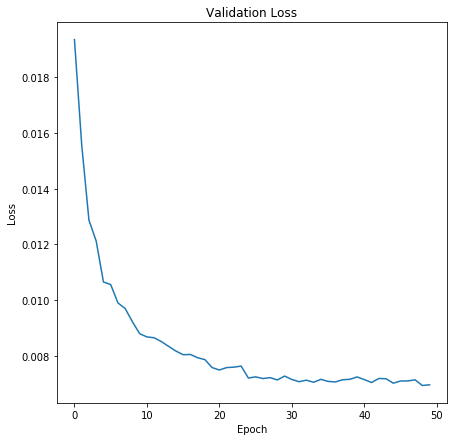

In [6]:
plot_graph(test_losses, "Loss")

## Plot Validatiion Accuracy

Plot the change in validation accracy vs epochs

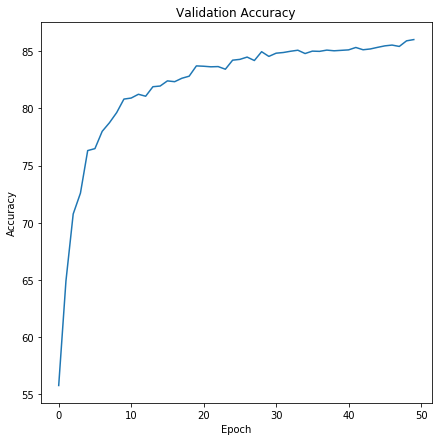

In [7]:
plot_graph(test_accs, "Accuracy")

## Misclassified Images

Display 25 misclassified test images

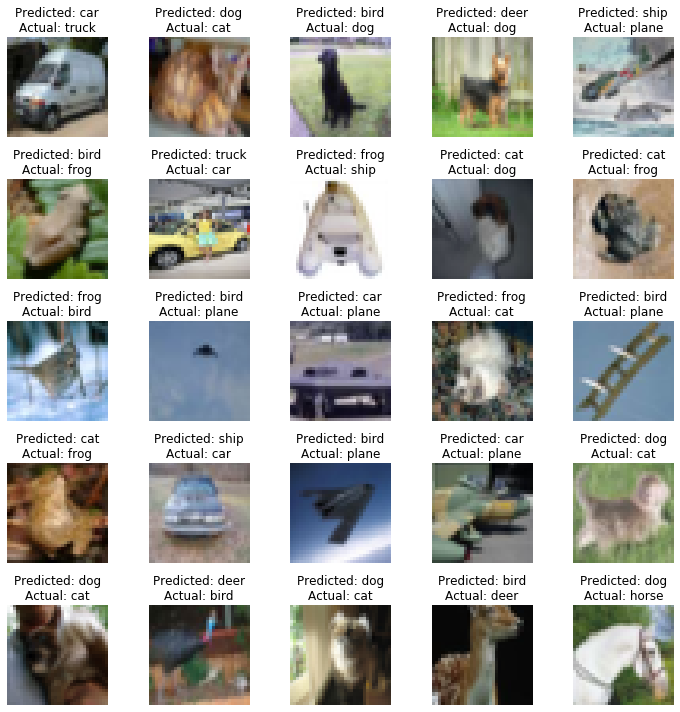

In [8]:
plot_misclassified_images(misclassified_imgs, data.classes, "misclassified_imgs.png")